In [1]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 31.7 MB/s eta 0:00:00


Generating Embeddings: 4900it [31:08,  2.62it/s]


Protein embeddings saved to /content/drive/MyDrive/Colab Notebooks/DDI_Prediction_Project/data/protein_embeddings.pt
Total proteins processed: 4900
Total proteins skipped: 0
Sample protein embeddings:
Protein ID: P45059, Embedding Shape: torch.Size([1024])
Protein ID: P19113, Embedding Shape: torch.Size([1024])
Protein ID: Q9UI32, Embedding Shape: torch.Size([1024])
Protein ID: P00488, Embedding Shape: torch.Size([1024])
Protein ID: P35228, Embedding Shape: torch.Size([1024])


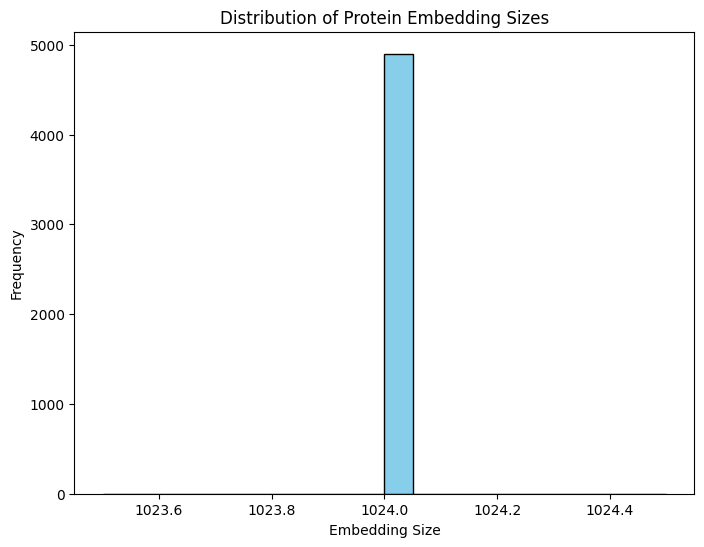

In [ ]:
# Install necessary libraries
!pip install transformers tqdm torch

# Import libraries
import torch
from transformers import BertModel, BertTokenizer
from Bio import SeqIO
from tqdm import tqdm

# Paths
input_fasta = "/content/drive/MyDrive/Colab Notebooks/DDI_Prediction_Project/data/cleaned_cleaned_protein_sequences.fasta"  # Input FASTA file
output_file = "/content/drive/MyDrive/Colab Notebooks/DDI_Prediction_Project/data/protein_embeddings.pt"  # Output file for embeddings
skipped_file = "/content/drive/MyDrive/Colab Notebooks/DDI_Prediction_Project/data/skipped_proteins.csv"  # Skipped protein IDs

# Load ProtBERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert", do_lower_case=False)
model = BertModel.from_pretrained("Rostlab/prot_bert")
model.eval()  # Set to evaluation mode

# Function to generate embeddings for a protein sequence
def generate_protein_embedding(sequence):
    embeddings = []
    for i in range(0, len(sequence), 1024):  # Split into chunks of 1024
        chunk = sequence[i:i+1024]
        tokens = tokenizer(chunk, return_tensors="pt", truncation=True, padding=True, max_length=1024)
        with torch.no_grad():
            outputs = model(**tokens)
        embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze())
    # Aggregate chunk embeddings (mean pooling)
    aggregated_embedding = torch.mean(torch.stack(embeddings), dim=0)
    return aggregated_embedding

# Parse FASTA file and generate embeddings
protein_embeddings = {}
skipped_proteins = []
for record in tqdm(SeqIO.parse(input_fasta, "fasta"), desc="Generating Embeddings"):
    protein_id = record.id
    sequence = str(record.seq)
    try:
        embedding = generate_protein_embedding(sequence)
        protein_embeddings[protein_id] = embedding
    except Exception as e:
        print(f"Skipping {protein_id} due to an error: {e}")
        skipped_proteins.append(protein_id)

# Save embeddings to file
torch.save(protein_embeddings, output_file)
print(f"Protein embeddings saved to {output_file}")

# Save skipped proteins to file
if skipped_proteins:
    import pandas as pd
    skipped_df = pd.DataFrame(skipped_proteins, columns=["protein_id"])
    skipped_df.to_csv(skipped_file, index=False)
    print(f"Skipped proteins saved to {skipped_file}")

# Proof Output
# Display the number of proteins processed and skipped
print(f"Total proteins processed: {len(protein_embeddings)}")
print(f"Total proteins skipped: {len(skipped_proteins)}")

# Display a sample of embeddings
sample_proteins = list(protein_embeddings.keys())[:5]
print("Sample protein embeddings:")
for protein_id in sample_proteins:
    print(f"Protein ID: {protein_id}, Embedding Shape: {protein_embeddings[protein_id].shape}")

# Visualization: Histogram of protein embedding sizes
embedding_sizes = [embedding.shape[0] for embedding in protein_embeddings.values()]
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(embedding_sizes, bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Protein Embedding Sizes")
plt.xlabel("Embedding Size")
plt.ylabel("Frequency")
plt.show()


In [2]:
import torch

# Path to your .pt file
output_file = "/content/drive/MyDrive/Colab Notebooks/DDI_Prediction_Project/data/protein_embeddings.pt"

# Load the .pt file
data = torch.load(output_file)

# Check the type of the data
print(f"Type of loaded data: {type(data)}")

# If it's a tensor, print specific rows
if isinstance(data, torch.Tensor):
    print(f"Shape of the tensor: {data.shape}")
    # Print the first 5 rows
    print(data[:5])

elif isinstance(data, dict):
    print("Keys in the dictionary:")
    for key in data.keys():
        print(key)

    # Assuming the dictionary contains tensors, access one tensor
    example_key = list(data.keys())[0]  # First key
    print(f"Inspecting data for key: {example_key}")
    tensor = data[example_key]
    print(f"Shape of tensor for key '{example_key}': {tensor.shape}")
    # Print the first 5 rows
    print(tensor[:5])

else:
    print("Unrecognized data structure.")


<ipython-input-2-c0efccd6273c>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(output_file)


Type of loaded data: <class 'dict'>
Keys in the dictionary:
P45059
P19113
Q9UI32
P00488
P35228
P37059
Q13423
P11766
P48728
P50213
Q9P0X4
P30542
P00519
P12319
P00451
P23219
P35626
P0A7V8
P21728
P12461
P35916
P51168
P02452
Q9H4B7
P56181
O95363
P17948
Q9UPY5
Q9UBM7
Q9BTZ2
P06213
P9WNL9
O60931
P04049
O00217
Q9Y285
P29401
Q9Y234
P12259
O00764
P24530
Q15738
P20309
P30613
Q9H2X9
P00734
P30273
P13716
P14060
O43246
P48167
P06818
P14780
P26439
P13674
P21554
P30556
P49591
P34995
P10515
P11836
P29475
P07195
P24752
O15496
Q07869
Q9HCC0
Q9UDR5
P51843
P10912
Q9UDX3
P00492
P28702
Q9Y600
Q8IWU9
O95299
P12277
P31358
Q13639
P02792
P42357
Q02809
P14618
O43920
Q12809
Q969P6
P11229
O75380
Q9Y289
P34972
Q15800
Q8N8R3
P11177
Q9NS75
Q9BYZ2
P17707
Q9BYV1
P44469
Q14894
P35610
O76082
P13688
P51606
Q9H244
P21673
P25021
P06746
P06149
P07741
P06864
Q16647
Q05940
O95477
Q49184
P17752
P9WNL7
P03372
P08192
P08700
Q04828
P0A7X3
P31937
P24046
P69905
P80365
P10275
P05091
P22888
P49419
Q8WY07
P19404
P09172
Q9Y4W6
Q9UHW9
P3

<ipython-input-2-7a03e1384192>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(output_file)


Number of proteins: 4900
Embedding shape: (4900, 1024)


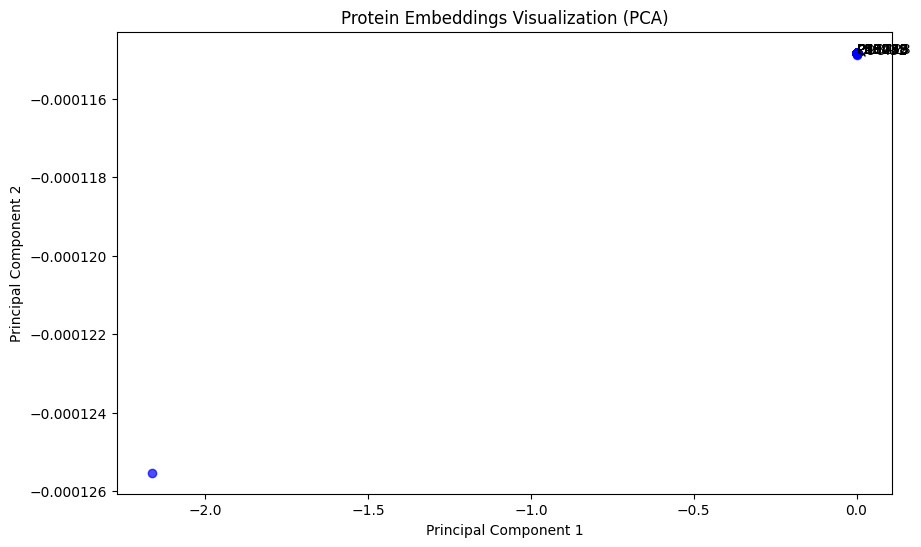

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


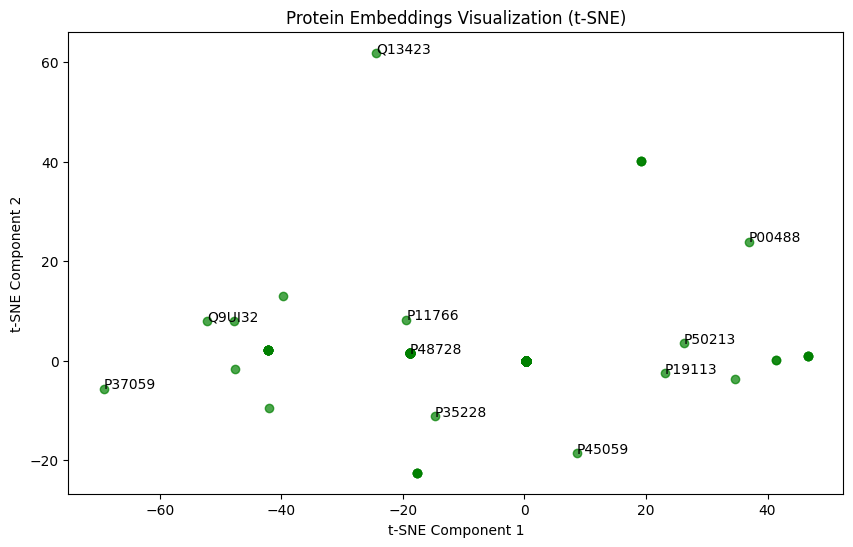

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Path to your .pt file
output_file = "/content/drive/MyDrive/Colab Notebooks/DDI_Prediction_Project/data/protein_embeddings.pt"

# Load the .pt file
data = torch.load(output_file)

# Convert the dictionary to a numpy array
protein_ids = list(data.keys())  # List of protein IDs
embeddings = torch.stack([data[key] for key in protein_ids]).numpy()  # Stack tensors into a numpy array

# Check shapes
print(f"Number of proteins: {len(protein_ids)}")
print(f"Embedding shape: {embeddings.shape}")

# Step 1: Dimensionality Reduction (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

# Step 2: Visualization of PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7, c='blue')
plt.title("Protein Embeddings Visualization (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
for i, txt in enumerate(protein_ids[:10]):  # Annotate the first 10 points
    plt.annotate(txt, (pca_result[i, 0], pca_result[i, 1]))
plt.show()

# Step 3: Dimensionality Reduction (t-SNE)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(embeddings)

# Step 4: Visualization of t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.7, c='green')
plt.title("Protein Embeddings Visualization (t-SNE)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
for i, txt in enumerate(protein_ids[:10]):  # Annotate the first 10 points
    plt.annotate(txt, (tsne_result[i, 0], tsne_result[i, 1]))
plt.show()


In [3]:
from sklearn.decomposition import PCA
import plotly.express as px

# Step 1: Reduce Dimensionality to 3D
pca_3d = PCA(n_components=3)
pca_3d_result = pca_3d.fit_transform(embeddings)

# Step 2: Interactive 3D Scatter Plot
fig = px.scatter_3d(
    x=pca_3d_result[:, 0],
    y=pca_3d_result[:, 1],
    z=pca_3d_result[:, 2],
    color=protein_ids,  # Optional grouping
    title="Protein Embeddings in 3D (PCA)"
)
fig.show()


In [8]:
!pip install networkx

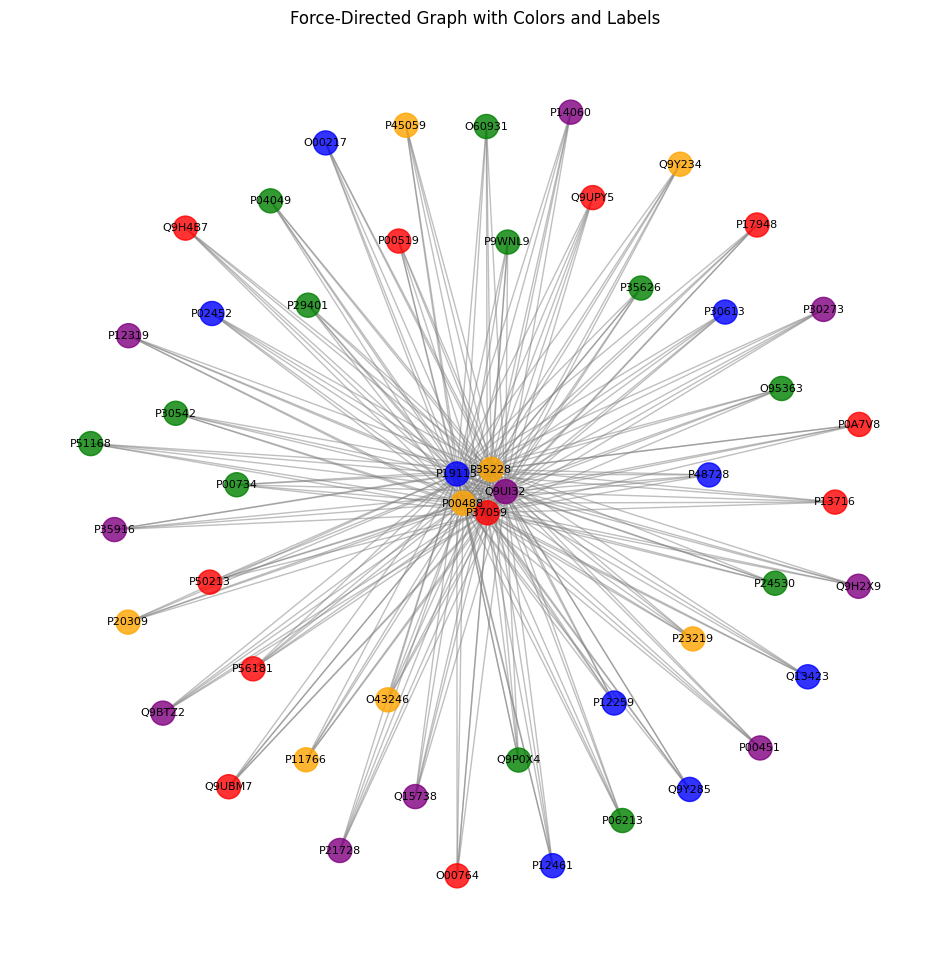

In [12]:
import networkx as nx
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt
import random

# Step 1: Create a k-Nearest Neighbors Graph
k = 5  # Number of neighbors
knn_graph = kneighbors_graph(embeddings[:50], n_neighbors=k, mode='connectivity')
graph = nx.Graph(knn_graph)

# Assign random colors to nodes (can use clustering results for meaningful colors)
node_colors = [random.choice(['red', 'blue', 'green', 'orange', 'purple']) for _ in range(len(graph.nodes))]

# Assign labels to nodes
node_labels = {i: protein_ids[i] for i in range(len(graph.nodes))}

# Step 2: Force-Directed Graph Visualization
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(graph, seed=42)  # Force-directed layout

# Draw the graph with colors
nx.draw_networkx_nodes(graph, pos, node_color=node_colors, node_size=300, alpha=0.8)
nx.draw_networkx_edges(graph, pos, edge_color='gray', alpha=0.5)
nx.draw_networkx_labels(graph, pos, labels=node_labels, font_size=8, font_color='black')

plt.title("Force-Directed Graph with Colors and Labels")
plt.axis("off")  # Remove axes
plt.show()
